# 数据处理以及特征筛选

不用运行以下cell，已经生成数据表了

In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, ttest_ind, levene
import warnings
warnings.filterwarnings('ignore') #消除warning

In [3]:
data1 = pd.read_csv('data.csv',header='infer')
data2 = data1.drop(['Unnamed: 0'],axis=1)
data2['TYPE'] = data2['TYPE'].replace(['HCC','Adjacent'],[0,1])

In [4]:
data1

,SAMPLE_ID,TYPE,Unnamed: 0,A1BG,A2M,NAT1,NAT2,SERPINA3,AADAC,AAMP,...,LOC100289341,ZNF605,NHEG1,LOC100302401,LOC100302640,LOC100302650,NCRNA00182,TMED7-TICAM2,TSNAX-DISC1,LOC100303728
0,HCCDB-15.S1,HCC,HCCDB-15.S1,15.57,16.20,6.29,6.76,16.53,11.38,10.49,...,4.76,7.62,2.30,2.92,0.00,5.51,3.68,4.06,0.00,5.59
1,HCCDB-15.S2,HCC,HCCDB-15.S2,8.61,11.66,5.12,1.72,11.52,11.01,11.10,...,4.31,9.15,0.82,2.98,1.34,2.76,3.93,6.83,1.21,5.06
2,HCCDB-15.S3,HCC,HCCDB-15.S3,12.77,16.34,6.67,5.22,14.39,11.97,10.55,...,4.07,9.15,0.00,4.18,0.75,2.54,4.13,5.83,0.00,4.43
3,HCCDB-15.S4,HCC,HCCDB-15.S4,14.76,17.96,6.72,7.31,15.03,11.97,11.27,...,4.97,9.12,0.00,3.58,0.88,3.23,2.60,5.93,0.00,3.36
4,HCCDB-15.S5,HCC,HCCDB-15.S5,12.83,14.38,7.81,7.23,14.59,12.29,11.06,...,3.66,8.95,0.00,3.52,0.00,2.16,2.99,4.96,0.00,5.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,HCCDB-15.S396,Adjacent,HCCDB-15.S396,16.28,18.13,8.35,9.63,16.40,13.83,11.23,...,4.73,7.70,0.00,2.72,0.70,5.66,4.20,5.26,0.00,4.79
396,HCCDB-15.S397,HCC,HCCDB-15.S397,16.66,16.71,7.79,8.17,16.88,12.33,11.37,...,3.82,7.92,0.00,3.23,0.68,3.13,4.57,6.11,0.00,5.59
397,HCCDB-15.S398,HCC,HCCDB-15.S398,14.55,14.79,7.95,10.49,16.14,13.51,11.34,...,5.06,8.56,0.00,4.05,2.61,3.87,2.40,0.00,0.00,4.48
398,HCCDB-15.S399,HCC,HCCDB-15.S399,15.55,16.60,6.50,7.65,17.21,11.99,11.31,...,4.88,6.87,0.00,3.70,0.94,5.69,2.90,5.51,0.00,5.66


In [5]:
data2

,SAMPLE_ID,TYPE,A1BG,A2M,NAT1,NAT2,SERPINA3,AADAC,AAMP,AANAT,...,LOC100289341,ZNF605,NHEG1,LOC100302401,LOC100302640,LOC100302650,NCRNA00182,TMED7-TICAM2,TSNAX-DISC1,LOC100303728
0,HCCDB-15.S1,0,15.57,16.20,6.29,6.76,16.53,11.38,10.49,0.00,...,4.76,7.62,2.30,2.92,0.00,5.51,3.68,4.06,0.00,5.59
1,HCCDB-15.S2,0,8.61,11.66,5.12,1.72,11.52,11.01,11.10,0.00,...,4.31,9.15,0.82,2.98,1.34,2.76,3.93,6.83,1.21,5.06
2,HCCDB-15.S3,0,12.77,16.34,6.67,5.22,14.39,11.97,10.55,1.25,...,4.07,9.15,0.00,4.18,0.75,2.54,4.13,5.83,0.00,4.43
3,HCCDB-15.S4,0,14.76,17.96,6.72,7.31,15.03,11.97,11.27,0.00,...,4.97,9.12,0.00,3.58,0.88,3.23,2.60,5.93,0.00,3.36
4,HCCDB-15.S5,0,12.83,14.38,7.81,7.23,14.59,12.29,11.06,0.00,...,3.66,8.95,0.00,3.52,0.00,2.16,2.99,4.96,0.00,5.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,HCCDB-15.S396,1,16.28,18.13,8.35,9.63,16.40,13.83,11.23,0.00,...,4.73,7.70,0.00,2.72,0.70,5.66,4.20,5.26,0.00,4.79
396,HCCDB-15.S397,0,16.66,16.71,7.79,8.17,16.88,12.33,11.37,0.00,...,3.82,7.92,0.00,3.23,0.68,3.13,4.57,6.11,0.00,5.59
397,HCCDB-15.S398,0,14.55,14.79,7.95,10.49,16.14,13.51,11.34,0.00,...,5.06,8.56,0.00,4.05,2.61,3.87,2.40,0.00,0.00,4.48
398,HCCDB-15.S399,0,15.55,16.60,6.50,7.65,17.21,11.99,11.31,1.51,...,4.88,6.87,0.00,3.70,0.94,5.69,2.90,5.51,0.00,5.66


In [7]:
data_1 = data2[data2['TYPE'] == 0]
data_2 = data2[data2['TYPE'] == 1]
rows_1,__ = data_1.shape
rows_2,__ = data_2.shape
data = pd.concat([data_1,data_2])
data = shuffle(data)

In [8]:
data

,SAMPLE_ID,TYPE,A1BG,A2M,NAT1,NAT2,SERPINA3,AADAC,AAMP,AANAT,...,LOC100289341,ZNF605,NHEG1,LOC100302401,LOC100302640,LOC100302650,NCRNA00182,TMED7-TICAM2,TSNAX-DISC1,LOC100303728
138,HCCDB-15.S139,0,12.95,13.49,6.77,6.58,10.56,13.82,11.62,2.02,...,4.48,7.52,0.0,4.25,0.00,3.40,3.98,3.61,0.0,4.30
194,HCCDB-15.S195,0,15.42,14.93,8.11,7.96,18.87,12.35,11.23,0.00,...,5.19,7.30,0.0,3.88,1.10,4.19,4.09,7.63,0.0,4.83
165,HCCDB-15.S166,0,9.43,16.05,6.64,5.40,18.11,9.75,11.12,1.10,...,3.99,8.99,0.0,3.64,1.10,6.92,3.88,8.59,0.0,4.18
162,HCCDB-15.S163,0,11.99,14.92,6.57,0.00,13.86,11.25,10.96,1.01,...,4.82,8.72,0.0,4.48,0.00,3.18,4.37,6.07,0.0,4.74
235,HCCDB-15.S236,0,16.65,17.27,7.80,9.99,17.89,12.97,11.19,0.00,...,4.73,7.56,0.0,2.35,0.00,6.14,4.98,5.90,0.0,4.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,HCCDB-15.S143,0,16.31,13.91,5.69,8.39,15.67,13.97,11.34,0.00,...,5.41,8.11,0.0,5.31,1.36,3.26,3.67,0.00,0.0,5.01
77,HCCDB-15.S78,0,15.44,12.46,5.88,4.90,17.64,8.31,11.76,0.74,...,5.39,8.21,0.0,3.47,0.00,2.95,2.67,5.10,0.0,5.39
44,HCCDB-15.S45,0,13.01,15.17,5.53,0.00,15.88,12.72,10.04,0.00,...,3.60,8.00,0.0,3.95,0.84,3.69,4.01,6.71,0.0,5.65
292,HCCDB-15.S293,0,13.09,15.69,5.91,5.69,14.65,12.44,11.24,0.00,...,5.21,8.60,0.0,4.01,0.00,3.03,5.44,7.84,0.0,5.59


T-test

In [2]:
data1 = pd.read_csv('data.csv',header='infer')
data2 = data1.drop(['Unnamed: 0'],axis=1)
data2['TYPE'] = data2['TYPE'].replace(['HCC','Adjacent'],[0,1])

data_1 = data2[data2['TYPE'] == 0]
data_2 = data2[data2['TYPE'] == 1]
rows_1,__ = data_1.shape
rows_2,__ = data_2.shape
data = pd.concat([data_1,data_2])
data = shuffle(data)
X = data[data.columns[1:]]
y = data['TYPE']
colNames = X.columns
X = X.astype(np.float64)
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.columns = colNames

index = []
for colName in data.columns[2:]:
    if levene(data_1[colName],data_2[colName])[1] > 0.05:
        if ttest_ind(data_1[colName],data_2[colName])[1] < 0.05:
            index.append(colName)
    else:
        if ttest_ind(data_1[colName],data_2[colName],equal_var = False)[1] < 0.05:
            index.append(colName)

if 'TYPE' not in index:index = ['TYPE']+index

t_test_data = data2[:data2.shape[0]][index]
t_test_data.to_csv('t-test_data.csv')

lasso回归

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV,LassoLarsCV
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
data = pd.read_csv('t-test_data.csv')

X = data.drop(['TYPE','Unnamed: 0'],axis=1)
y = data['TYPE']
colNames = X.columns
x = StandardScaler().fit_transform(X)   
x = pd.DataFrame(x)
x.columns = colNames   

alphas = np.logspace(-5,1,50)   
model_lassoCV = LassoCV(alphas = alphas,cv=10,max_iter=1000,random_state=1,fit_intercept=True,n_jobs=-1).fit(x,y)
print(model_lassoCV.alpha_)

coef = pd.Series(model_lassoCV.coef_,index=x.columns)
print('Lasso picked'+str(sum(coef != 0))+'variables and eliminated the other'+str(sum(coef == 0)))

index = coef[coef !=0].index
x_lasso = x[index]

0.006551285568595509
Lasso picked175variables and eliminated the other14035


<function matplotlib.pyplot.show(close=None, block=None)>

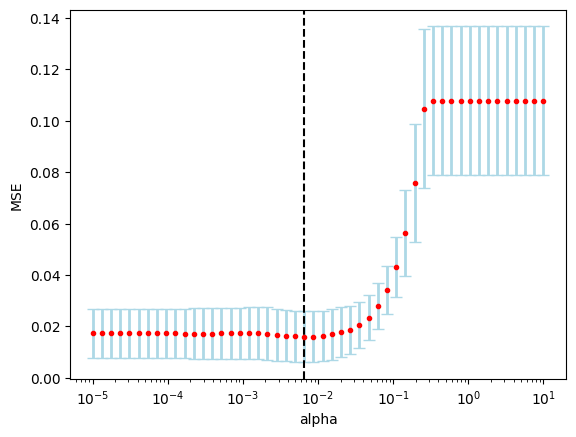

In [5]:
import matplotlib.pyplot as plt

MSEs = model_lassoCV.mse_path_

MSEs_mean = np.apply_along_axis(np.mean,1,MSEs)
MSEs_std = np.apply_along_axis(np.std,1,MSEs)


plt.figure()
plt.errorbar(model_lassoCV.alphas_,MSEs_mean
            ,yerr=MSEs_std
            ,fmt='o'
            ,ms=3
            ,mfc='r'
            ,mec='r'
            ,ecolor='lightblue'
            ,elinewidth=2
            ,capsize=4
            ,capthick=1)
plt.semilogx()
plt.axvline(model_lassoCV.alpha_,color='black',ls='--')
plt.xlabel('alpha')
plt.ylabel('MSE')
ax=plt.gca()
plt.show

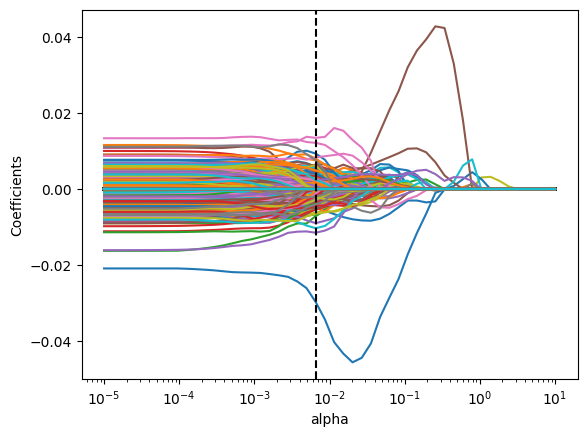

In [6]:
coefs = model_lassoCV.path(X,y,alphas = alphas,max_iter=1000)[1].T
plt.figure()
plt.semilogx(model_lassoCV.alphas_,coefs,'-')
plt.axvline(model_lassoCV.alpha_,color='black',ls='--')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.show()

In [7]:
x_lasso.to_csv('x_lasso.csv',index=False)

# 测试集划分

In [8]:
from sklearn.model_selection import train_test_split
xtrain_lasso, xtest_lasso, ytrain_lasso, ytest_lasso = train_test_split(x_lasso, y, test_size=0.20, random_state=1)

# SMOTE处理

In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smo = SMOTE(random_state=666)
x_smo,y_smo = smo.fit_resample(xtrain_lasso,ytrain_lasso)

# 定义函数

In [10]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def show_scores(y_pred1,y_pred2,y_test):
    print("accuracy_score is:",metrics.accuracy_score(y_test,y_pred1))
    print("roc_auc_score is:",metrics.roc_auc_score(y_test,y_pred2))
    print("precision_score is:",metrics.precision_score(y_test,y_pred1))
    print("recall_score is:",metrics.recall_score(y_test,y_pred1))
    print("f1_score is:",metrics.f1_score(y_test,y_pred1))
    print("classification_report:")
    print(metrics.classification_report(y_test,y_pred1))
    
def plot_roc(y_pred2,y_test,name):
    fpr, tpr, thersholds = roc_curve(y_test, y_pred2, pos_label=1)
    fpr,tpr,threshold = roc_curve(y_test, y_pred2) 
    roc_auc = auc(fpr,tpr) 
    plt.figure()
    lw = 2
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.05])  
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  
    plt.title(name)
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('./naive_bayes.jpg')#保存图片

def show_confusion_matrix(model,X_test,y_test,y_pred1):
    y_pred = model.predict(X_test)
    confmat = confusion_matrix(y_true=y_test,y_pred=y_pred1)
    fig,ax = plt.subplots(figsize=(2.5,2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()    

# 网格搜索所需要的库

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# 训练选择

决策树

In [12]:
from sklearn import tree
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,20,2)]
}
tree = tree.DecisionTreeClassifier(random_state=25)    
GS = GridSearchCV(tree, parameters, cv=10,n_jobs=-1) 
GS.fit(x_smo,y_smo)
print(GS.best_params_)

#{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'splitter': 'random'}

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'splitter': 'random'}


In [13]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=3,splitter='random')
dt = dt.fit(x_smo,y_smo)
predY_1 = dt.predict(xtest_lasso)
predY_2 = dt.predict_proba(xtest_lasso)[:,1]

accuracy_score is: 0.9625
roc_auc_score is: 0.9357142857142857
precision_score is: 0.8181818181818182
recall_score is: 0.9
f1_score is: 0.8571428571428572
classification_report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.82      0.90      0.86        10

    accuracy                           0.96        80
   macro avg       0.90      0.94      0.92        80
weighted avg       0.96      0.96      0.96        80



<Figure size 640x480 with 0 Axes>

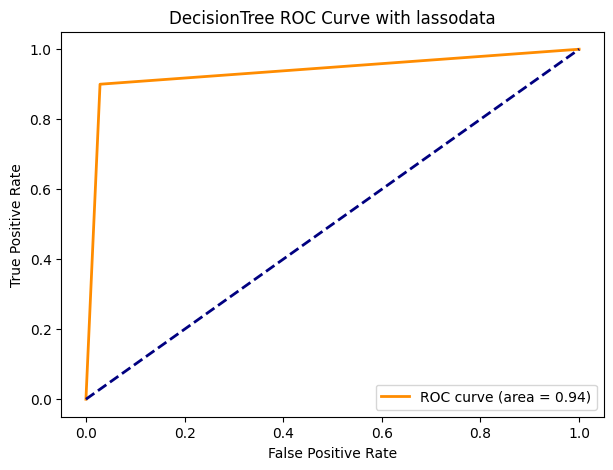

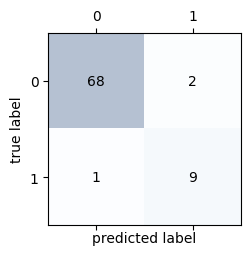

In [14]:
show_scores(predY_1,predY_2,ytest_lasso)

plot_roc(predY_2,ytest_lasso,'DecisionTree ROC Curve with lassodata')

show_confusion_matrix(dt,xtest_lasso,ytest_lasso,predY_1)

朴素贝叶斯（伯努利）

In [15]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB,MultinomialNB,ComplementNB,BernoulliNB

parameters={'binarize':[*np.arange(-2.0,2.0,0.1)]
           ,'fit_prior':('True','False')
           ,'alpha': [*np.arange(-2.0,2.0,0.1)]
           }
GS=GridSearchCV(BernoulliNB(),parameters,cv=10,n_jobs=-1)
GS.fit(x_smo,y_smo)
print(GS.best_params_) 

#{'alpha': 1.7763568394002505e-15, 'binarize': -0.2999999999999985, 'fit_prior': 'True'}

{'alpha': 1.7763568394002505e-15, 'binarize': -0.2999999999999985, 'fit_prior': 'True'}


In [16]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB,MultinomialNB,ComplementNB,BernoulliNB
NB = BernoulliNB(alpha=1.7763568394002505e-15,binarize=-0.2999999999999985,fit_prior=True)
NB=NB.fit(x_smo,y_smo)
predY_2=NB.predict_proba(xtest_lasso)[:,1]
predY_1=NB.predict(xtest_lasso)

accuracy_score is: 0.9875
roc_auc_score is: 1.0
precision_score is: 1.0
recall_score is: 0.9
f1_score is: 0.9473684210526316
classification_report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.90      0.95        10

    accuracy                           0.99        80
   macro avg       0.99      0.95      0.97        80
weighted avg       0.99      0.99      0.99        80



<Figure size 640x480 with 0 Axes>

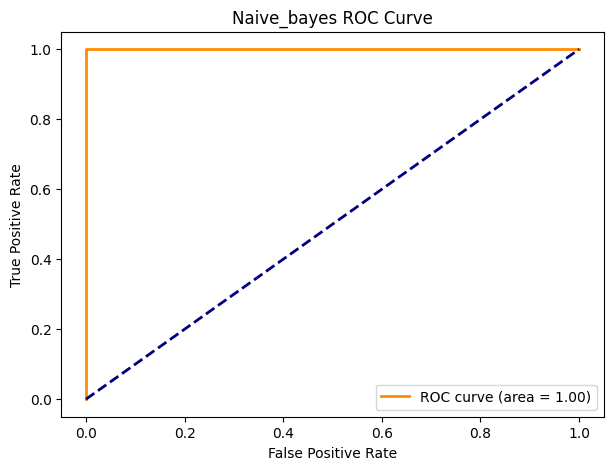

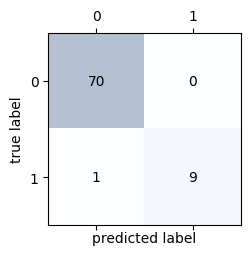

In [17]:
show_scores(predY_1,predY_2,ytest_lasso)
plot_roc(predY_2,ytest_lasso,'Naive_bayes ROC Curve')
show_confusion_matrix(NB,xtest_lasso,ytest_lasso,predY_1)

SVC

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
#param_grid = [{'svc__C':param_range,'svc__kernel':['linear','rbf'],'svc__gamma':param_range}]
GS = RandomizedSearchCV(estimator=pipe_svc, param_distributions=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
GS = GS.fit(x_smo,y_smo)
print(GS.best_score_)
print(GS.best_params_)

#1.0
#{'svc__kernel': 'rbf', 'svc__gamma': 0.01, 'svc__C': 10.0}

1.0
{'svc__kernel': 'linear', 'svc__C': 0.1}


In [19]:
from sklearn.svm import SVC

svc = make_pipeline(StandardScaler(), SVC(kernel='rbf',C=10,gamma=0.01,probability=True))
svc=svc.fit(x_smo,y_smo)

predY_2=svc.predict_proba(xtest_lasso)[:,1]
predY_1=svc.predict(xtest_lasso)

accuracy_score is: 1.0
roc_auc_score is: 1.0
precision_score is: 1.0
recall_score is: 1.0
f1_score is: 1.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        10

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Figure size 640x480 with 0 Axes>

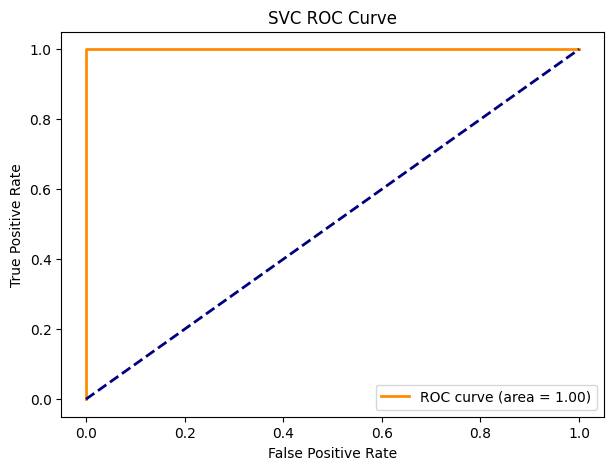

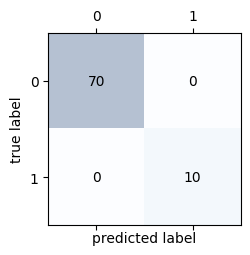

In [20]:
show_scores(predY_1,predY_2,ytest_lasso)
plot_roc(predY_2,ytest_lasso,'SVC ROC Curve')
show_confusion_matrix(svc,xtest_lasso,ytest_lasso,predY_1)

KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25, metric='minkowski', p=2)
knn = knn.fit(x_smo,y_smo)
predY_2=knn.predict_proba(xtest_lasso)[:,1]
predY_1=knn.predict(xtest_lasso)

accuracy_score is: 1.0
roc_auc_score is: 1.0
precision_score is: 1.0
recall_score is: 1.0
f1_score is: 1.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        10

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Figure size 640x480 with 0 Axes>

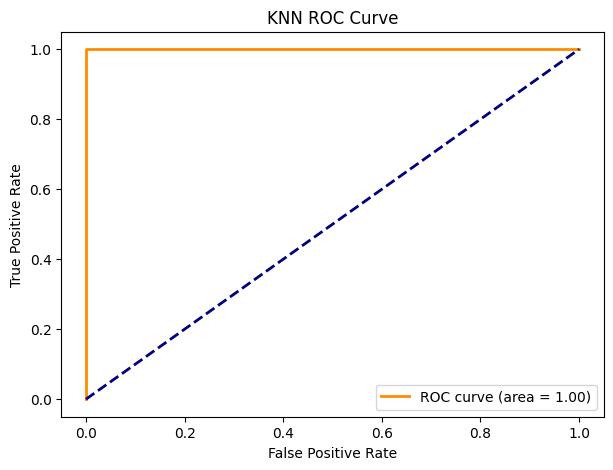

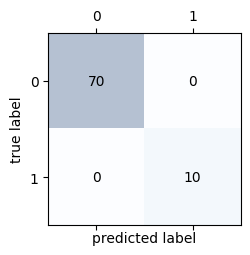

In [22]:
show_scores(predY_1,predY_2,ytest_lasso)
plot_roc(predY_2,ytest_lasso,'KNN ROC Curve')
show_confusion_matrix(knn,xtest_lasso,ytest_lasso,predY_1)

随机森林

In [23]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
rf = ensemble.RandomForestClassifier()
rf = rf.fit(x_smo,y_smo)
predY_2=rf.predict_proba(xtest_lasso)[:,1]
predY_1=rf.predict(xtest_lasso)

accuracy_score is: 1.0
roc_auc_score is: 1.0
precision_score is: 1.0
recall_score is: 1.0
f1_score is: 1.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        10

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Figure size 640x480 with 0 Axes>

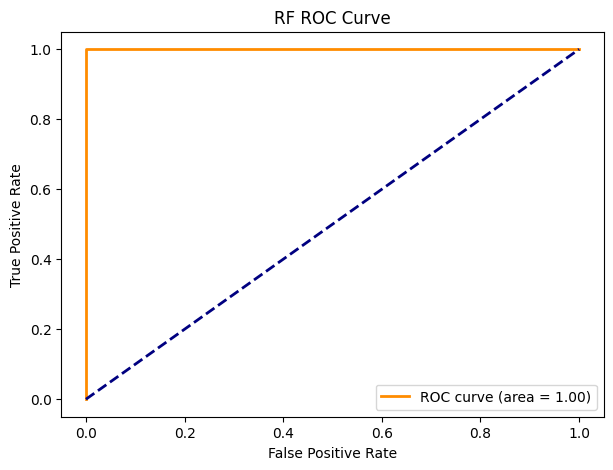

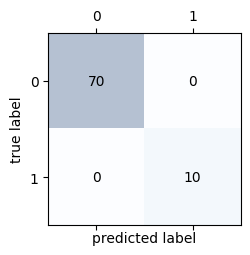

In [24]:
show_scores(predY_1,predY_2,ytest_lasso)
plot_roc(predY_2,ytest_lasso,'RF ROC Curve')
show_confusion_matrix(rf,xtest_lasso,ytest_lasso,predY_1)

AdaBoost

In [25]:
ada = ensemble.AdaBoostClassifier()
ada = ada.fit(x_smo,y_smo)
predY_2=ada.predict_proba(xtest_lasso)[:,1]
predY_1=ada.predict(xtest_lasso)

accuracy_score is: 1.0
roc_auc_score is: 1.0
precision_score is: 1.0
recall_score is: 1.0
f1_score is: 1.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        10

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Figure size 640x480 with 0 Axes>

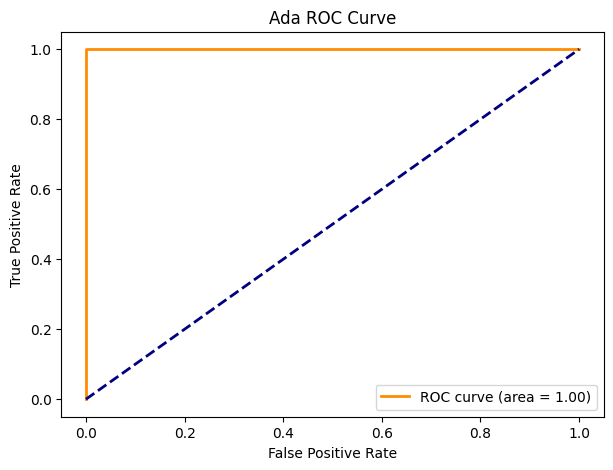

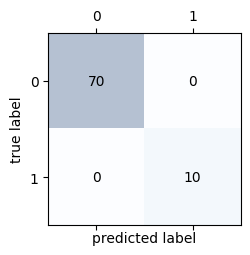

In [26]:
show_scores(predY_1,predY_2,ytest_lasso)
plot_roc(predY_2,ytest_lasso,'Ada ROC Curve')
show_confusion_matrix(ada,xtest_lasso,ytest_lasso,predY_1)